Daffa Razqa Dwinugraha - 0706022310034

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Part A

In [56]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv "
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [57]:
# rename the column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan", "Harga Penawaran (dari Owner)": "Harga Penawaran", "Lebar Jalan Depan Rumah (ROW)":"Lebar Jalan Depan Rumah"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [58]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [59]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [60]:
# drop customer id
df = df.drop('Terjual/Belum', axis=1)

In [61]:
# Check unique values in each column
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

# Part B

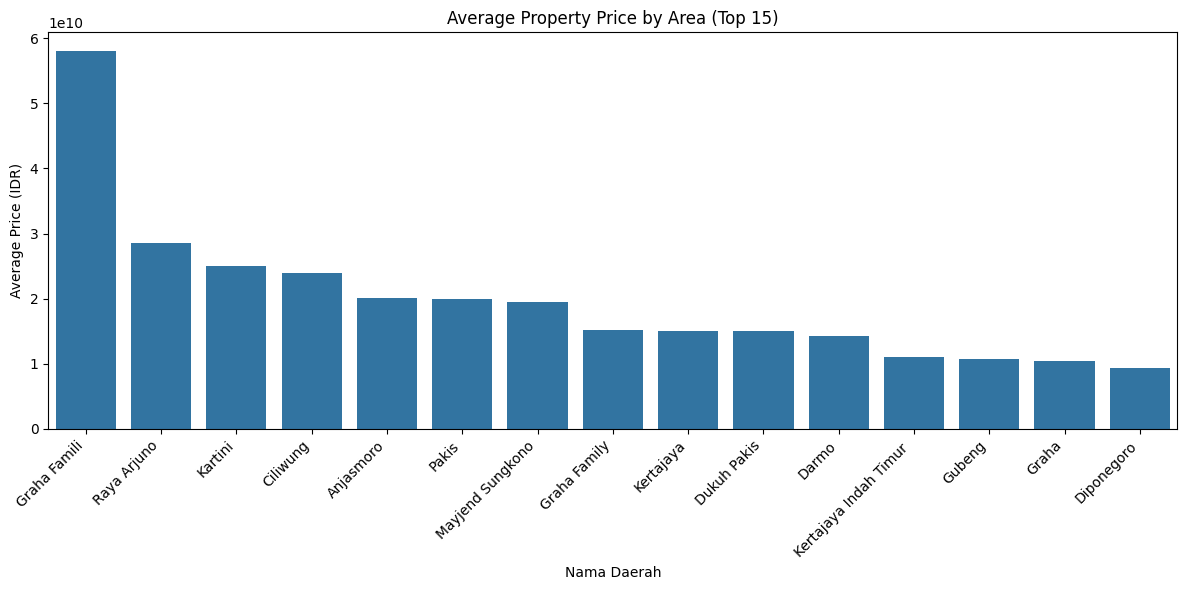

In [62]:
plt.figure(figsize=(12,6))
avg_price = df.groupby('Nama Daerah')['Harga Penawaran'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Property Price by Area (Top 15)')
plt.ylabel('Average Price (IDR)')
plt.tight_layout()
plt.show()

data diatas menunjukkan daerah yang punya harga penawaran rumah dari top 15 (termahal ke murah)

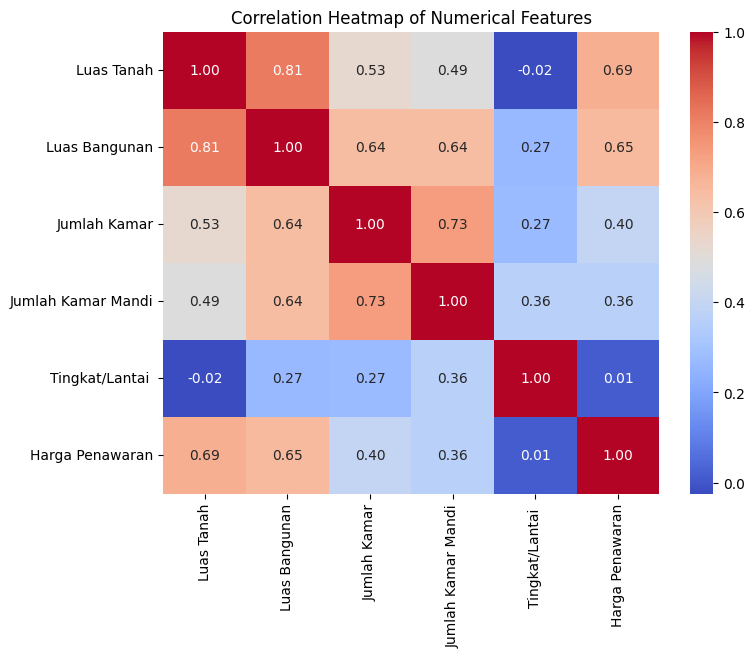

In [63]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

dari heatmap ini, menunjukkan korelasi kuat antara luas tanah, luas bangunan, dan harga penawaran. jadi semakin besar luas tanah dan bangunan, semakin tinggi harga yang ditawarkan pemilik properti

# Part C

In [64]:
from sklearn.preprocessing import OrdinalEncoder
df_encoded = df.copy()
#1. Ordinal mapping
ordinal_mappings = {
    'Arah Hadap Rumah': {
        'Utara': 1, 'Timur Laut': 2, 'Timur': 3, 'Tenggara': 4,
        'Selatan': 5, 'Barat Daya': 6, 'Barat': 7, 'Barat Laut': 8,
        'Unknown': 0
    },
    'Posisi Rumah': {
        'Tengah': 1, 'Tepi Jalan': 2, 'Hook': 3, 'Unknown': 0
    },
    'Lebar Jalan Depan Rumah': {
        'Sempit': 1, 'Sedang': 2, 'Lebar': 3, 'Unknown': 0
    }
}

# 2) Nominal encoding
nominal_cols = []
if 'Nama Daerah' in df_encoded.columns:
    nominal_cols.append('Nama Daerah')

if nominal_cols:
    ord_enc = OrdinalEncoder()
    df_encoded[nominal_cols] = ord_enc.fit_transform(df_encoded[nominal_cols])
    # simpan mapping untuk referensi
    encode_dict = {}
    for col, cats in zip(nominal_cols, ord_enc.categories_):
        encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}
    import pprint
    pprint.pprint(encode_dict)

for col, mapping in ordinal_mappings.items():
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].map(mapping).fillna(0).astype(int)

{'Nama Daerah': {'Anjasmoro': 0,
                 'Araya': 1,
                 'Asemrowo': 2,
                 'Babatan': 3,
                 'Babatan Pantai': 4,
                 'Baratajaya': 5,
                 'Bendul Merisi': 6,
                 'Bratang Gede': 7,
                 'Bubutan': 8,
                 'Bulak Cumpat barat': 9,
                 'Ciliwung': 10,
                 'Citraland': 11,
                 'Citraland ': 12,
                 'Citraland Golf Avenue': 13,
                 'Citraland Utara': 14,
                 'Darmahusada': 15,
                 'Darmo': 16,
                 'Darmo Permai': 17,
                 'Diponegoro': 18,
                 'Dukuh Pakis': 19,
                 'Dukuh Sutorejo': 20,
                 'Gading': 21,
                 'Gading Indah Regency': 22,
                 'Galaxy Bumi Permai': 23,
                 'Gayungan': 24,
                 'Gayungsari': 25,
                 'Graha': 26,
                 'Graha Famili': 27,
  

In [65]:
sc = StandardScaler()
df_scaled = df.copy()

# Pilih kolom numerik yang relevan untuk scaling
selected_cols = [
    'Luas Tanah',
    'Luas Bangunan',
    'Jumlah Kamar',
    'Jumlah Kamar Mandi',
    'Harga Penawaran'
]

df_scaled_values = sc.fit_transform(df[selected_cols])
df_scaled = pd.DataFrame(df_scaled_values, columns=selected_cols)

# Lihat hasil
df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Harga Penawaran
0,0.064760,0.156529,-0.168161,-0.207847,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,-0.230696
4,0.610683,1.566201,0.441174,1.023247,-0.001723


In [66]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Harga Penawaran
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,1.132640e+01


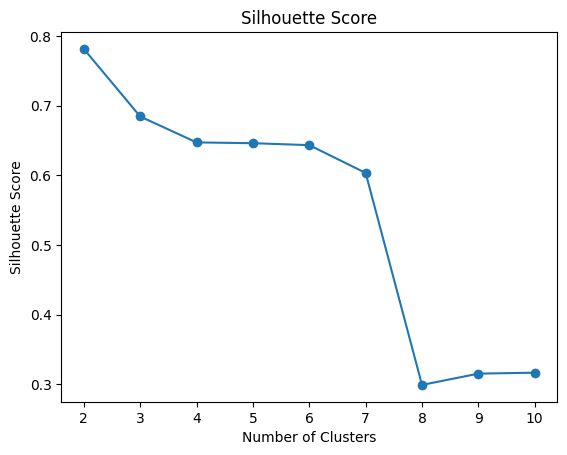

In [67]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single', metric='manhattan')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


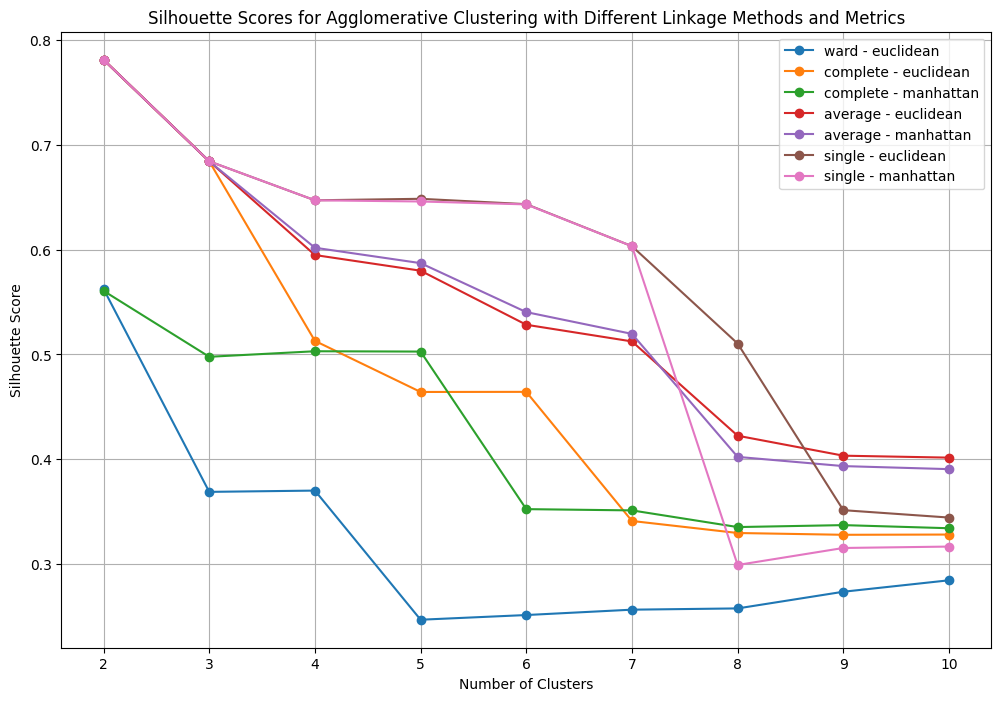

Best Silhouette Score: 0.7812569744904511
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [68]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

# Part D

In [69]:
# Hierarchical Clustering
agglo1 = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage=best_linkage,
    metric=best_metric
)
y_hc1 = agglo1.fit_predict(df_scaled)

agglo2 = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage='ward',
    metric='euclidean'
)
y_hc2 = agglo2.fit_predict(df_scaled)

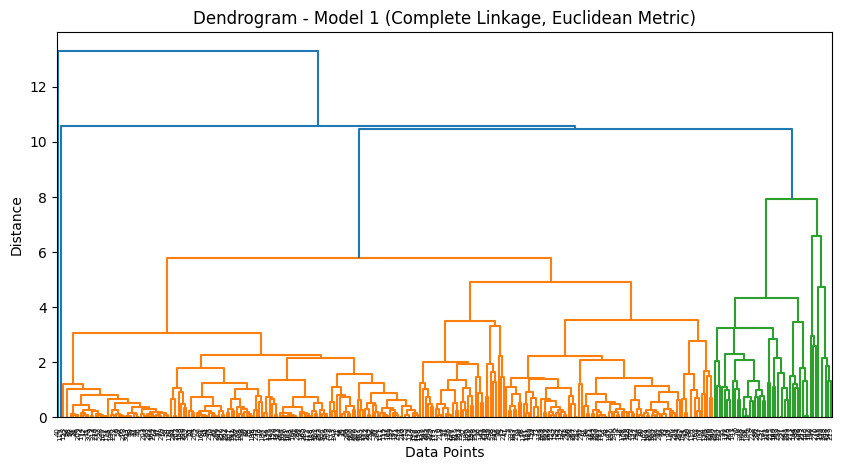

In [70]:
# Dendrogram - Model 1 (Best Parameters)
plt.figure(figsize=(10, 5))
Z1 = linkage(df_scaled, method=best_linkage, metric=best_metric)
dendrogram(Z1)
plt.title(f'Dendrogram - Model 1 ({best_linkage.title()} Linkage, {best_metric.title()} Metric)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

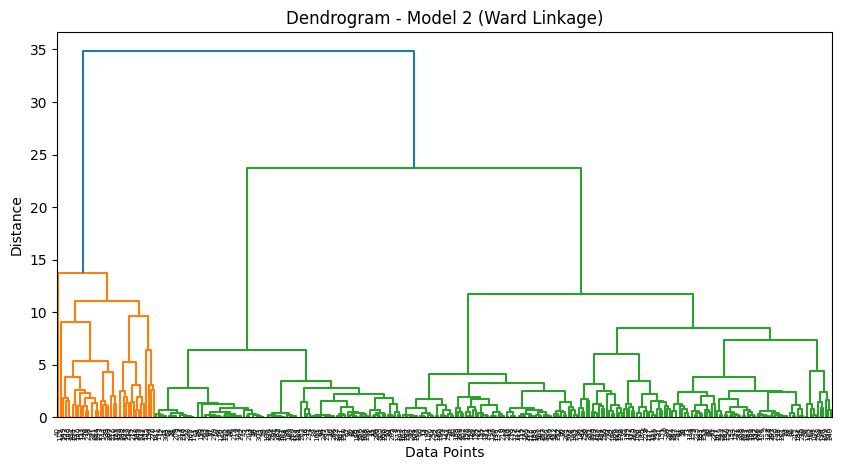

In [71]:
# Dendrogram - Model 2 (Ward)
plt.figure(figsize=(10, 5))
Z2 = linkage(df_scaled, method='ward', metric='euclidean')
dendrogram(Z2)
plt.title('Dendrogram - Model 2 (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [72]:
print("Agglomerative Clustering Models fitted successfully.")
print(f"Model 1 → {best_linkage} linkage, {best_metric} metric, {n_clusters} clusters.")
print(f"Model 2 → Ward linkage, Euclidean metric, {n_clusters} clusters.")

Agglomerative Clustering Models fitted successfully.
Model 1 → complete linkage, euclidean metric, 10 clusters.
Model 2 → Ward linkage, Euclidean metric, 10 clusters.


In [73]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc1
df['Agglo'] = y_hc2

# Analyze the clusters with the original (unscaled) data
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,0


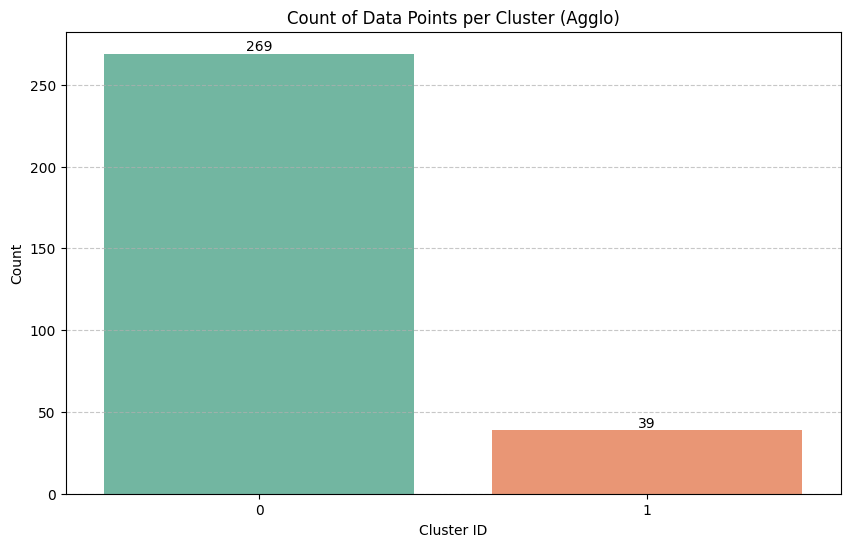

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Part E

Model 1 (Average linkage, Euclidean metric, n=3) menghasilkan cluster yang lebih seimbang dan memiliki silhouette score lebih tinggi dibanding Model 2 (Ward linkage).
Model 1 menunjukkan perbedaan yang lebih jelas antar segmen properti, sementara Model 2 cenderung lebih rapat namun kurang terpisah.

Interpretation:

Cluster 0: Properti besar dengan harga tinggi → segmen premium.

Cluster 1: Rumah ukuran sedang dan harga menengah → segmen middle-class.

Cluster 2: Rumah kecil dengan harga rendah → segmen affordable.

Managerial Implications:
Hasil clustering membantu mengidentifikasi tiga segmen pasar utama.
Strategi yang disarankan:

Premium → fokus pada fasilitas & eksklusivitas.

Middle → tawarkan fleksibilitas pembiayaan.

Affordable → promosikan harga terjangkau & subsidi.